# Delay-and-Sum Beamformer - Linear Array of Finite Length

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the masters module Selected Topics in Audio Signal Processing, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Beampattern

This example evaluates the properties of a delay-and-sum (DSB) beamformer for a linear array of finite length. First the periodic sinc function is computed and plotted as it determines the properties of the beampattern. The beampattern for various steering angles is then computed and plotted, followed by the directivity index (DI) as quantitative measure for the directional properties of the beamformer.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

dx = 0.1  # spatial sampling interval (distance of microphones)
M = 8  # total number of microphones
c = 343  # speed of sound
om = 2*np.pi * np.linspace(20, 8000, 1000)  # evaluated angular frequencies

### Properties of the Periodic Sinc Function

The consequences of truncating a microphone array of infinte length can be quantified by considering the properties of the periodic sinc function whose magnitude is plotted in the following.

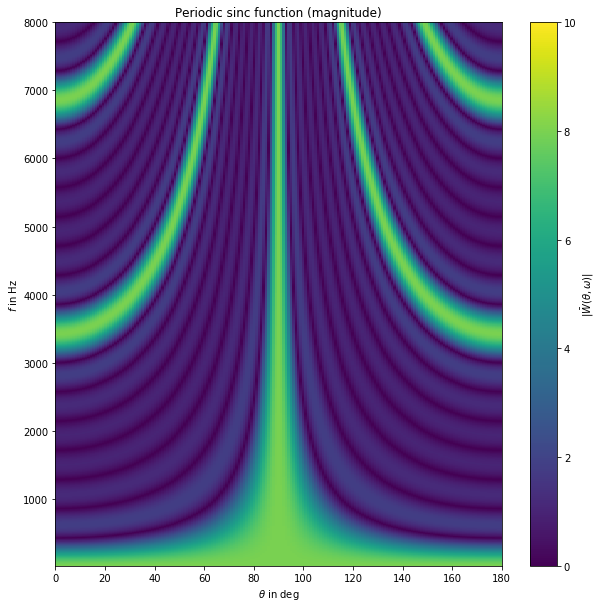

In [2]:
theta = np.linspace(0, np.pi, 181)  # evaluated angles


def psinc(x, N):
    x = np.asanyarray(x)
    y = np.where(x == 0, 1.0e-20, x)
    return 1/N * np.sin(N/2*y)/np.sin(1/2*y)


W = np.zeros(shape=(len(om), len(theta)), dtype=complex)
for n in range(len(om)):
    W[n, :] = M * np.exp(1j*om[n]/c*dx*(M-1)/2) * psinc(om[n]*np.cos(theta)*dx/c, M)

plt.figure(figsize=(10,10))
plt.imshow(np.abs(W), aspect='auto', vmin=0, vmax=M+2, origin='lower', \
           extent=[0, 180, om[0]/(2*np.pi), om[-1]/(2*np.pi)], cmap='viridis')
plt.xlabel(r'$\theta$ in deg')
plt.ylabel('$f$ in Hz')
plt.title('Periodic sinc function (magnitude)')
cb = plt.colorbar()
cb.set_label(r'$|\bar{W}(\theta, \omega)|$')

### Beampattern

The beampattern of a DSB beamformer for a linear array of finite length is computed and plotted for various steering angles. First, two functions are defined for computation and illustration of the beampattern, respectively.

In [3]:
theta_pw = np.linspace(0, np.pi, 181)  # angles of the incident plane waves

def compute_dsb_beampattern(theta, theta_pw, om, dx, M):
    "Compute beampattern of a delay-and-sub beamformer for given steering angle"
    B = np.zeros(shape=(len(om), len(theta_pw)), dtype=complex)
    for n in range(len(om)):
        for mu in range(0, M):
            B[n, :] += np.exp(-1j * om[n]/c * mu*dx * (np.cos(theta_pw) - np.cos(theta)))
            
    return B/M


def plot_dsb_beampattern(B, theta_pw, om):
    "Plot beampattern of a delay-and-sub beamformer"
    plt.figure(figsize=(10,10))
    plt.imshow(20*np.log10(np.abs(B)), aspect='auto', vmin=-30, vmax=0, origin='lower', \
               extent=[0, 180, om[0]/(2*np.pi), om[-1]/(2*np.pi)], cmap='viridis')
    plt.xlabel(r'$\theta_{pw}$ in deg')
    plt.ylabel('$f$ in Hz')
    plt.title('Beampattern')
    cb = plt.colorbar()
    cb.set_label(r'$|\bar{P}(\theta, \theta_{pw}, \omega)|$ in dB')

#### Steering Direction $\theta = 90^\mathrm{o}$

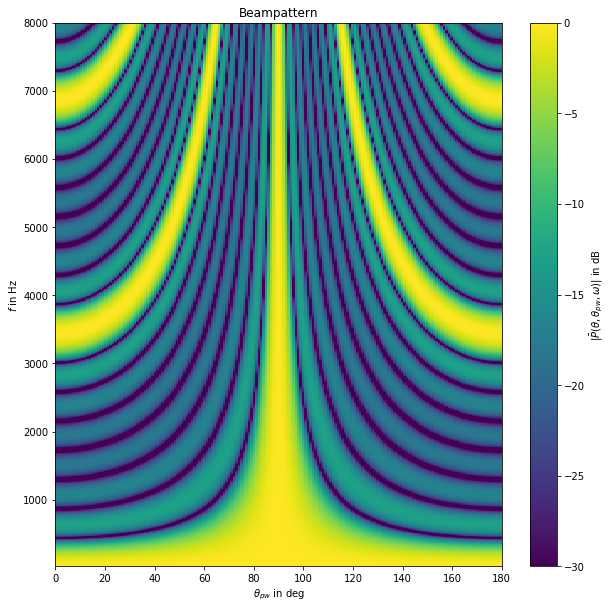

In [4]:
B = compute_dsb_beampattern(np.pi/2, theta_pw, om, dx, M)
plot_dsb_beampattern(B, theta_pw, om)

#### Steering Direction $\theta = 45^\mathrm{o}$

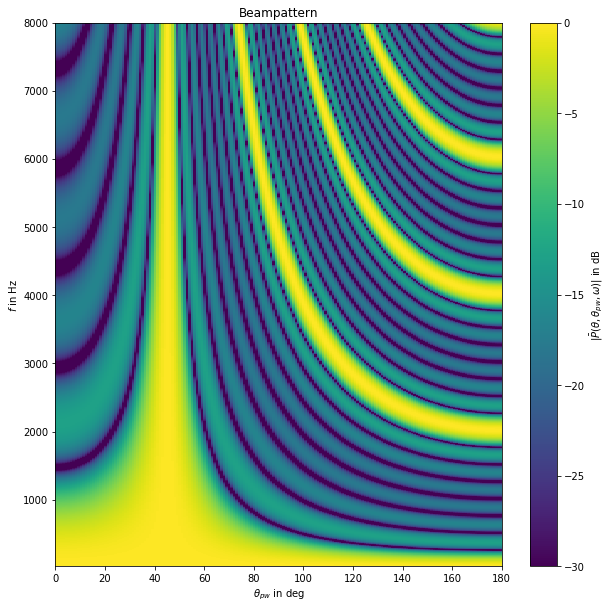

In [5]:
B = compute_dsb_beampattern(np.pi/4, theta_pw, om, dx, M)
plot_dsb_beampattern(B, theta_pw, om)

#### Steering Direction $\theta = 0^\mathrm{o}$

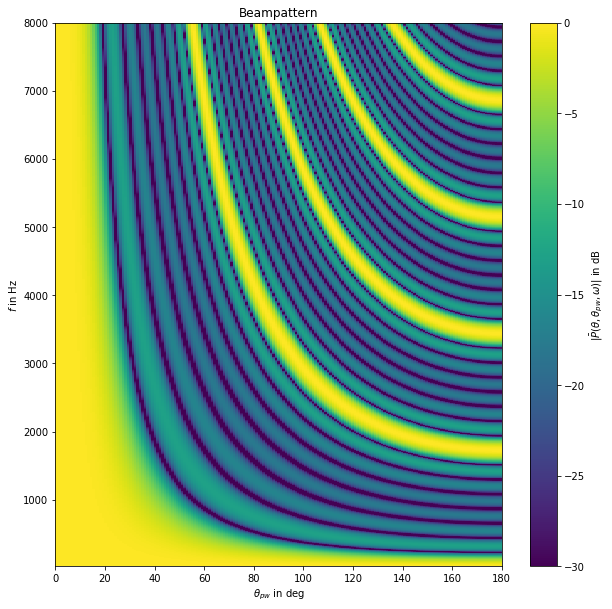

In [6]:
B = compute_dsb_beampattern(0, theta_pw, om, dx, M)
plot_dsb_beampattern(B, theta_pw, om)

### Directivity Index

The directivity factor is a quantitative measure for the spatial selectivity of a beamformer. The directivity index (DI) is the logarithm of the directivity factor. The DI is computed and plotted for the above considered steering angles.

In [7]:
def compute_directivity_factor(B, idx):
    "Computes the directivity factor for a given beampattern"
    DF = np.abs(B[:, idx])**2 / (1/B.shape[1] * np.sum(np.abs(B)**2, axis=1))
    return DF

def plot_directivity_index(DF):
    "Plots the directivity index"
    plt.plot(om/(2*np.pi), 10*np.log10(DF))
    plt.xlabel(r'$f$ in Hz')
    plt.ylabel(r'$\mathrm{DI}(\theta, \omega)$ in dB')
    plt.grid()

#### Steering Direction $\theta = 90^\mathrm{o}$

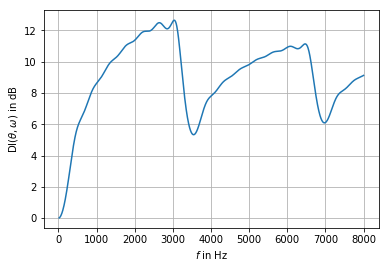

In [8]:
B = compute_dsb_beampattern(np.pi/2, theta_pw, om, dx, M)
DF = compute_directivity_factor(B, 90)
plot_directivity_index(DF)

#### Steering Direction $\theta = 45^\mathrm{o}$

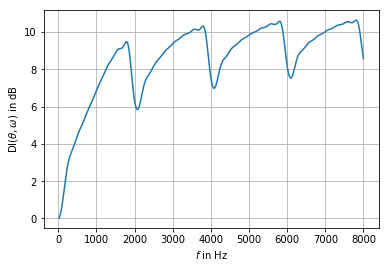

In [9]:
B = compute_dsb_beampattern(np.pi/4, theta_pw, om, dx, M)
DF = compute_directivity_factor(B, 45)
plot_directivity_index(DF)

#### Steering Direction $\theta = 0^\mathrm{o}$

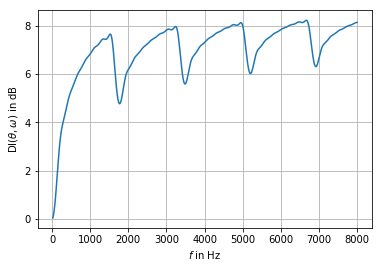

In [10]:
B = compute_dsb_beampattern(0, theta_pw, om, dx, M)
DF = compute_directivity_factor(B, 0)
plot_directivity_index(DF)

**Copyright**

This notebook is provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text/images/data are licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Selected Topics in Audio Signal Processing - Supplementary Material, 2017*.